# Simple Prophet Examples

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:

import numpy as np
import pandas as pd
import os 
import fbprophet

# help ipython find our path
directory = os.path.dirname(os.path.dirname(os.path.abspath('')))
os.chdir(directory)

import forecastframe as ff


Importing plotly failed. Interactive plots will not work.


## Non-Hierarchical Example

In [3]:
prophet_data = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv")

In [4]:
prophet_data

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


In [5]:
fframe = ff.ForecastFrame(data=prophet_data, target="y", datetime_column="ds")

In [6]:
fframe.predict(model="prophet", future_periods=10, weekly_seasonality=True, daily_seasonality=True)
fframe.predictions


,floor,t,trend,predicted_y_lower,predicted_y_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,predicted_y
ds,,,,,,,,,,,,,,,,,,,,,
1992-01-01,0,0.000000,149250.780024,121767.076444,140761.511995,149250.780024,149250.780024,-17915.521136,-17915.521136,-17915.521136,...,2190.602073,2190.602073,2190.602073,-33809.820838,-33809.820838,-33809.820838,0.0,0.0,0.0,131335.258888
1992-02-01,0,0.003488,150289.708735,122180.184882,141244.038392,150289.708735,150289.708735,-19157.883666,-19157.883666,-19157.883666,...,-2451.820633,-2451.820633,-2451.820633,-30409.760662,-30409.760662,-30409.760662,0.0,0.0,0.0,131131.825070
1992-03-01,0,0.006751,151261.609788,155415.567796,173509.472972,151261.609788,151261.609788,13521.656530,13521.656530,13521.656530,...,-4777.748263,-4777.748263,-4777.748263,4595.707164,4595.707164,4595.707164,0.0,0.0,0.0,164783.266318
1992-04-01,0,0.010240,152300.538499,155599.864549,174553.816593,152300.538499,152300.538499,12575.781666,12575.781666,12575.781666,...,2190.602073,2190.602073,2190.602073,-3318.518036,-3318.518036,-3318.518036,0.0,0.0,0.0,164876.320165
1992-05-01,0,0.013615,153305.953381,170028.988471,187774.756606,153305.953381,153305.953381,26010.621730,26010.621730,26010.621730,...,-73.563839,-73.563839,-73.563839,12380.487939,12380.487939,12380.487939,0.0,0.0,0.0,179316.575111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-07,0,1.000675,448979.625130,464485.344645,483192.795920,448979.625130,448979.625130,25030.284420,25030.284420,25030.284420,...,-2451.820633,-2451.820633,-2451.820633,13778.407423,13778.407423,13778.407423,0.0,0.0,0.0,474009.909550
2016-05-08,0,1.000788,449025.071656,463594.377829,481119.855046,449025.071656,449025.071656,23506.097887,23506.097887,23506.097887,...,-4777.748263,-4777.748263,-4777.748263,14580.148520,14580.148520,14580.148520,0.0,0.0,0.0,472531.169543
2016-05-09,0,1.000900,449070.518182,469637.580347,487877.267134,449070.518182,449070.518182,28853.201249,28853.201249,28853.201249,...,-306.310804,-306.310804,-306.310804,15455.814424,15455.814424,15455.814424,0.0,0.0,0.0,477923.719431


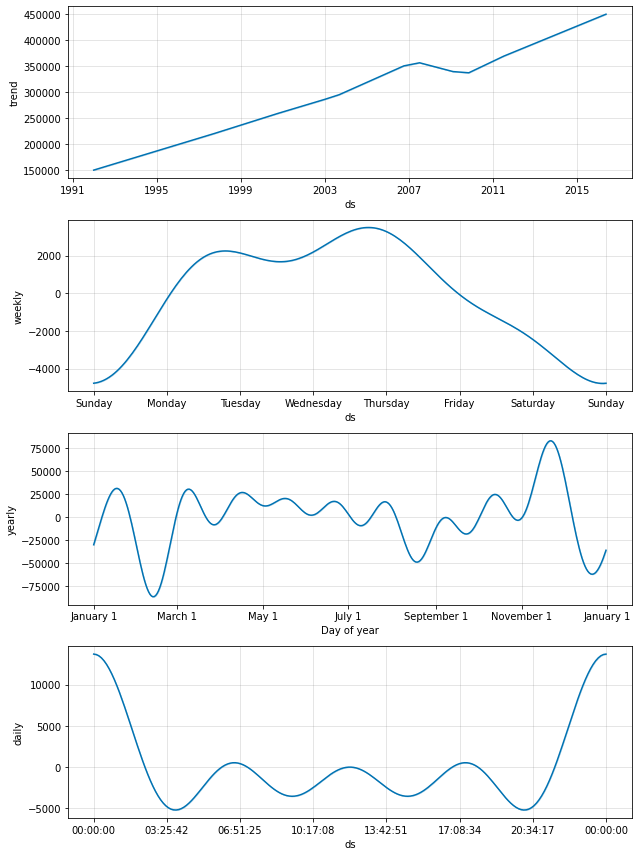

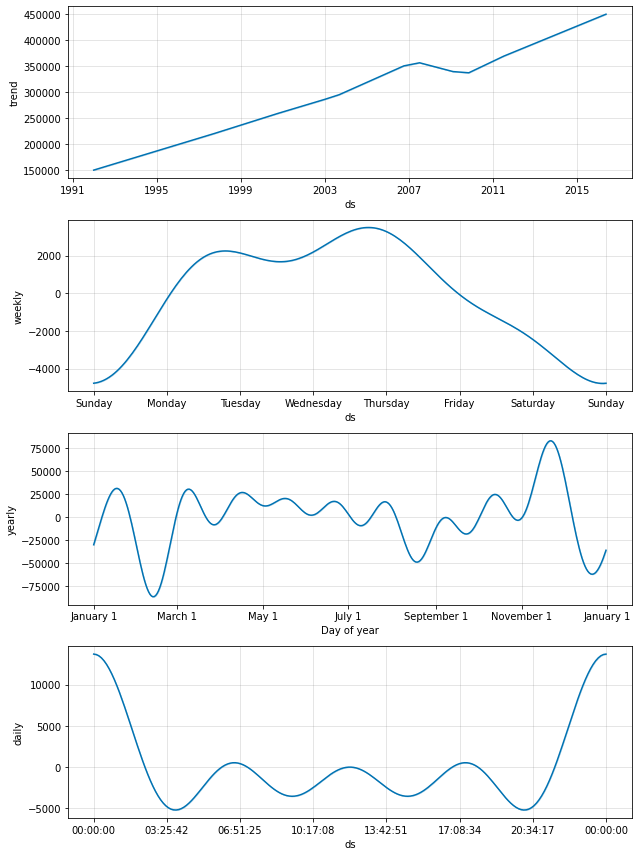

In [7]:
fframe.plot_components()

In [8]:
fframe.get_predictions()

,trend,predicted_y,predicted_y_upper,predicted_y_lower
ds,,,,
1992-01-01,149250.780024,131335.258888,140761.511995,121767.076444
1992-02-01,150289.708735,131131.825070,141244.038392,122180.184882
1992-03-01,151261.609788,164783.266318,173509.472972,155415.567796
1992-04-01,152300.538499,164876.320165,174553.816593,155599.864549
1992-05-01,153305.953381,179316.575111,187774.756606,170028.988471
...,...,...,...,...
2016-05-07,448979.625130,474009.909550,483192.795920,464485.344645
2016-05-08,449025.071656,472531.169543,481119.855046,463594.377829
2016-05-09,449070.518182,477923.719431,487877.267134,469637.580347


In [9]:
fframe.get_errors()

,Actuals,Predictions,Absolute Percent Error,Absolute Error,Squared Error
count,293.000000,293.000000,293.000000,293.000000,2.930000e+02
mean,308971.310580,308971.430803,0.019505,5671.404632,5.252161e+07
std,86084.323897,85622.285250,0.016581,4519.567783,8.274258e+07
min,146376.000000,131131.825070,0.000001,0.331767,1.100694e-01
25%,234503.000000,235586.265327,0.008071,2234.232871,4.991797e+06
50%,314051.000000,318376.545866,0.015901,4640.050641,2.153007e+07
75%,375795.000000,370050.289741,0.024941,8033.921990,6.454390e+07
max,518253.000000,507987.462463,0.108426,22100.229318,4.884201e+08


In [10]:
fframe.cross_validate(folds=3)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
# check that the latest round of predictions stored in the object were created using the params found in cross-validation
assert fframe.results["estimator"].seasonality_mode == fframe.cross_validations[-1]["best_params"]["seasonality_mode"]

In [12]:
fframe.get_cross_validation_errors()

[{'In-Sample':              Actuals    Predictions  Absolute Percent Error  Absolute Error  \
  count      74.000000      74.000000               74.000000       74.000000   
  mean   198509.472973  198491.867873                0.050104    10083.191491   
  std     26907.419353   22375.499866                0.049940    10943.462357   
  min    146376.000000  155959.330002                0.000153       26.167567   
  25%    176693.500000  181545.230686                0.012393     2298.031114   
  50%    199172.500000  197959.748690                0.028598     5685.623925   
  75%    217961.000000  214673.898390                0.074053    14046.914810   
  max    271054.000000  240194.669356                0.179570    43296.390865   
  
         Squared Error  
  count   7.400000e+01  
  mean    2.198117e+08  
  std     4.325281e+08  
  min     6.847415e+02  
  25%     5.281192e+06  
  50%     3.232724e+07  
  75%     1.973184e+08  
  max     1.874577e+09  ,
  'Out-of-Sample':           

In [13]:
fframe.cross_validations[0]["test"]

,ds,y,predicted_y
0,1998-03-01,230313,225889.467947
1,1998-04-01,234503,234661.483315
2,1998-05-01,245027,235414.358755
3,1998-06-01,244067,239774.172447
4,1998-07-01,241431,248628.421302
...,...,...,...
68,2003-11-01,301265,305004.513365
69,2003-12-01,357577,302976.983224
70,2004-01-01,281460,303511.437231
71,2004-02-01,282444,294805.307417


In [24]:
fframe.date_format

'%b. %Y'

In [55]:
fframe.summarize_cv_fit()

,Actuals,Predictions,Absolute Percent Error,Absolute Error,Squared Error
0,146376,156559.044442,0.069568,10183.044442,1.036944e+08
1,147079,153817.986640,0.045819,6738.986640,4.541394e+07
2,159336,155112.127056,0.026509,4223.872944,1.784110e+07
3,163669,161649.152788,0.012341,2019.847212,4.079783e+06
4,170068,162758.025162,0.042983,7309.974838,5.343573e+07
...,...,...,...,...,...
215,400264,354863.020012,0.113428,45400.979988,2.061249e+09
216,314640,349952.120956,0.112230,35312.120956,1.246946e+09
217,311022,347513.900072,0.117329,36491.900072,1.331659e+09
218,360819,349039.836009,0.032646,11779.163991,1.387487e+08


In [67]:
_summarize_cv_errors(cv_errors)

{'In-Sample': 0.05249067809613007, 'Out-of-Sample': 0.12185225720027194}

'Performance: For our last fold, our model achieved a median 3.45% in-sample Absolute Percent Error and a 11.47% out-of-sample Absolute Percent Error. On a weighted average basis, our model achieved a 5.25% in-sample error and a 12.19% out-of-sample error. The difference between our out-of-sample median and weighted average values suggests that our model is more accurate when predicting smaller values of our `y` variable. \n\n Fit: The 8.01% error differential between our out-of-sample and in-sample results suggests that our model is tuned correctly. Given your 11.47% out-of-sample performance and the 8.01% difference between your in-sample and out-of-sample results, we would recommend making a few minor improvements to control for underfitting. Here are a few tips to control for underfitting: \n - Add more training data and/or resample your existing data \n - Add new features or modifying existing features based on insights from feature importance analysis \n - Reduce or eliminate reg

KeyboardInterrupt: 